<a href="https://colab.research.google.com/github/Sameersah/data-science-methodology/blob/main/KDD/CRISP_DM_SEMMA_AND_KDD_assignments_PART_3_KDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KDD

The Knowledge Discovery in Databases (KDD) process is a structured approach to extracting meaningful insights and patterns from large datasets, often used in data mining. KDD is essential when dealing with complex and extensive datasets where a clear understanding of hidden patterns can provide valuable insights or solutions.

### Phases of KDD:
1. **Selection**: Identify and gather relevant data from multiple sources to create a focused dataset.
2. **Preprocessing**: Clean and preprocess the data to handle missing values, remove inconsistencies, and address noise to ensure data quality.
3. **Transformation**: Transform the data into suitable formats for analysis, including feature selection or reduction to simplify and enhance the dataset.
4. **Data Mining**: Apply statistical or machine learning techniques to uncover patterns, associations, or correlations within the data.
5. **Interpretation/Evaluation**: Analyze and interpret the results, validating the findings to ensure they make sense and are useful.

### When to Use KDD:
KDD is ideal for projects where large datasets need deep, nuanced insights. It’s particularly valuable in applications like fraud detection, customer segmentation, recommendation systems, and any domain requiring complex pattern recognition.

This methodology ensures that raw data is carefully processed to derive actionable insights, making it a strong choice for data science projects where data-driven decisions are paramount.

# Project Overview
For this project, the objective will be to uncover patterns and trends in the annual death rate data, with a potential focus on age-related mortality trends over time.

# Selection:
In this phase, we selected relevant columns from the dataset, focusing on age group, year, and death rate. These variables are central to analyzing trends in mortality rates across different age groups and over time. This selection will enable us to streamline the dataset for further processing and knowledge extraction.

In [9]:
## Connect to google drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/CMPE-255/user_behavior_dataset.csv')

# Inspect the dataset structure and first few rows
print(data.info())





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB
None


In [11]:
print(data.head())

   User ID    Device Model Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5          Android                       393   
1        2       OnePlus 9          Android                       268   
2        3    Xiaomi Mi 11          Android                       154   
3        4  Google Pixel 5          Android                       239   
4        5       iPhone 12              iOS                       187   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                     1872   
1                         4.7                     1331   
2                         4.0                      761   
3                         4.8                     1676   
4                         4.3                     1367   

   Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                        67                 1122   40    Male   
1                        42                  944   47  Female   
2                

In [12]:
# Display column names to identify the exact names in the dataset
print(data.columns)

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')


## Data Preprocessing

Data preprocessing is the second step in the KDD methodology. This involves handling missing values, converting data types for consistency, removing duplicates, and identifying outliers. These steps ensure the data is clean and ready for analysis, which is essential for obtaining reliable insights in the subsequent steps.

In [14]:
# Separate numeric and non-numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = data.select_dtypes(exclude=['float64', 'int64']).columns

# Fill missing values in numeric columns with the mean
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Fill missing values in non-numeric columns with the mode (most frequent value)
for col in non_numeric_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Verify if missing values are handled
print("Missing values after filling:\n", data.isnull().sum())


Missing values after filling:
 User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64



## Data Transforamtion

In this step, data transformation is conducted to prepare the dataset for analysis and modeling. Categorical variables are encoded into numerical format, ensuring that all features are suitable for machine learning algorithms. Additionally, numerical features are standardized to bring them to a common scale, enhancing the performance of certain algorithms. These transformations provide a more structured dataset for modeling.

In [15]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables using LabelEncoder
label_encoders = {}
for col in non_numeric_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Save encoder for future reference

# Normalize numerical columns
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Display the transformed dataset
data.head()


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,-1.729578,0,0,0.688256,0.367626,0.423726,0.606096,0.300405,0.126383,1,0.721184
1,-1.724629,1,0,-0.017668,-0.186771,-0.237198,-0.322441,0.022277,0.709506,0,0.007140
2,-1.719681,3,0,-0.661471,-0.415053,-0.933550,-0.693856,-0.949607,0.292989,1,-0.706903
3,-1.714732,0,0,-0.181443,-0.154160,0.184279,0.197540,-0.091787,-1.539682,1,0.007140
4,-1.709783,4,1,-0.475107,-0.317218,-0.193218,0.271823,0.091028,-0.623346,0,0.007140


## Data Mining

n the data mining step, we apply machine learning techniques to identify patterns and build predictive models. We select a target variable based on the problem’s requirements and split the dataset into training and testing sets. A random forest classifier is used as a baseline model to predict the target variable, and we evaluate its performance using metrics like accuracy and a classification report.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the target variable and features
target_variable = 'Operating System'
X = data.drop(columns=[target_variable, 'User ID'])  # Drop non-predictive columns like 'User ID'
y = data[target_variable]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00        45

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210



## Interpretation

The interpretation and knowledge discovery step focuses on deriving insights from the model’s predictions. We analyze feature importance to determine which factors most influence the prediction of the operating system. This reveals the behavioral or demographic traits most strongly associated with different operating systems. Additionally, evaluating metrics such as accuracy and precision provides a measure of the model’s effectiveness in distinguishing between operating systems.

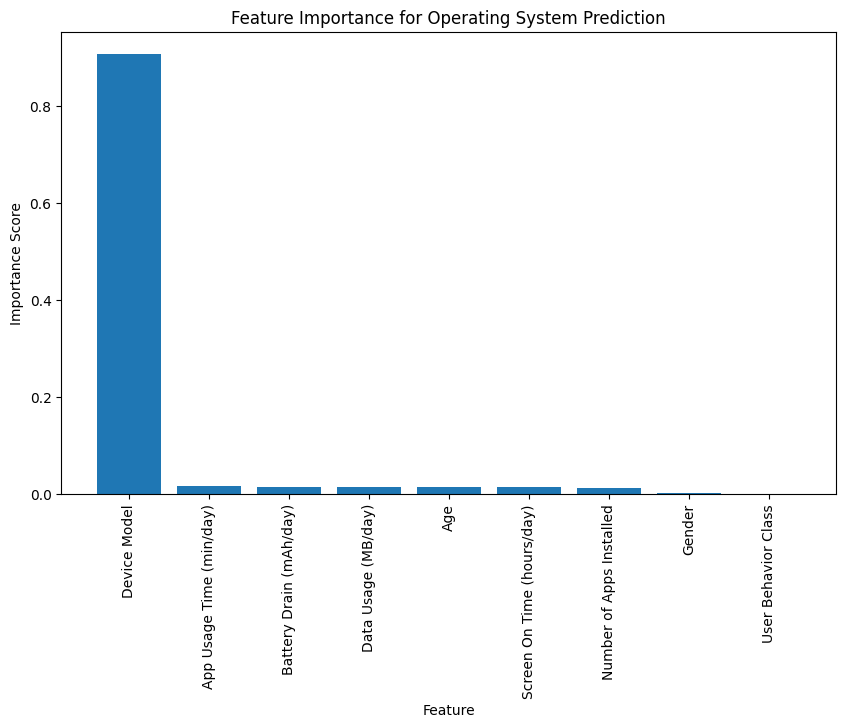

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Check feature importance from the trained random forest model
feature_importances = model.feature_importances_
features = X.columns

# Sort and plot feature importances
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importance for Operating System Prediction")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.show()
